In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
df  = pd.read_csv('/content/data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [4]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 8371
Total Number of columns : 17


In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [7]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        8371 non-null   int64   
 1   job        8371 non-null   category
 2   marital    8371 non-null   category
 3   education  8371 non-null   category
 4   default    8371 non-null   category
 5   balance    8371 non-null   int64   
 6   housing    8371 non-null   category
 7   loan       8371 non-null   category
 8   contact    8371 non-null   category
 9   day        8371 non-null   int64   
 10  month      8371 non-null   category
 11  duration   8371 non-null   int64   
 12  campaign   8371 non-null   int64   
 13  pdays      8371 non-null   int64   
 14  previous   8371 non-null   int64   
 15  poutcome   8371 non-null   category
 16  deposit    8371 non-null   category
dtypes: category(10), int64(7)
memory usage: 541.6 KB


In [9]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

management       1923
blue-collar      1472
technician       1371
admin.           1017
services          671
retired           563
self-employed     307
unemployed        282
student           273
entrepreneur      244
housemaid         197
unknown            51
Name: job, dtype: int64

 married     4744
single      2645
divorced     982
Name: marital, dtype: int64

 secondary    4113
tertiary     2754
primary      1128
unknown       376
Name: education, dtype: int64

 no     8244
yes     127
Name: default, dtype: int64

 no     4354
yes    4017
Name: housing, dtype: int64

 no     7250
yes    1121
Name: loan, dtype: int64

 cellular     6041
unknown      1763
telephone     567
Name: contact, dtype: int64

 may    2135
jul    1152
aug    1150
jun     912
nov     698
apr     661
feb     595
oct     280
jan     257
sep     241
mar     199
dec      91
Name: month, dtype: int64

 unknown    6269
failure     895
success     807
other       400
Name: poutcome, dtype: int64


In [106]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "deposit":    {"no": 0, "yes": 1} 
                    }

df=df.replace(replaceStruct)
df.head(15)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,38,3,0,127,1,0,14,10,113,1,...,0,0,0,0,0,1,0,0,1,0
1,41,1,0,365,0,0,8,8,203,5,...,0,0,1,0,0,1,0,0,0,1
2,39,3,0,2454,1,0,4,5,716,3,...,0,0,0,0,1,0,0,1,0,0
3,49,1,0,6215,1,0,11,5,549,1,...,0,0,0,0,0,1,0,0,0,1
4,37,2,0,1694,1,1,29,1,404,2,...,0,0,0,0,0,1,0,1,0,0
5,40,2,0,-666,1,0,27,5,107,2,...,0,0,0,0,0,1,0,0,0,1
6,54,2,0,0,0,0,5,2,744,3,...,0,0,0,0,0,1,0,0,0,1
7,48,2,0,1730,1,0,4,5,361,1,...,0,0,0,0,0,1,0,0,1,0
8,29,-1,0,560,0,0,5,4,459,1,...,0,0,0,0,1,0,0,1,0,0
9,52,2,0,431,0,0,26,8,73,17,...,0,0,0,0,0,1,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        8371 non-null   int64
 1   job        8371 non-null   int64
 2   marital    8371 non-null   int64
 3   education  8371 non-null   int64
 4   default    8371 non-null   int64
 5   balance    8371 non-null   int64
 6   housing    8371 non-null   int64
 7   loan       8371 non-null   int64
 8   contact    8371 non-null   int64
 9   day        8371 non-null   int64
 10  month      8371 non-null   int64
 11  duration   8371 non-null   int64
 12  campaign   8371 non-null   int64
 13  pdays      8371 non-null   int64
 14  previous   8371 non-null   int64
 15  poutcome   8371 non-null   int64
 16  deposit    8371 non-null   int64
dtypes: int64(17)
memory usage: 1.1 MB


In [12]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
df.isnull().values.any()

False

In [14]:
df.isna().values.any()

False

In [15]:
for value in df.columns:
     print(value,":", sum(df[value] == '?'))

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
deposit : 0


In [16]:
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
age,8371.0,41.197467,11.809300,18.0,32.0,39.0,49.0,95.0
job,8371.0,3.797993,2.685271,-1.0,2.0,3.0,5.0,11.0
marital,8371.0,1.801338,0.627584,1.0,1.0,2.0,2.0,3.0
education,8371.0,2.059491,0.929818,-1.0,2.0,2.0,3.0,3.0
default,8371.0,0.015171,0.122242,0.0,0.0,0.0,0.0,1.0
balance,8371.0,1517.811134,3225.312218,-3058.0,116.0,532.0,1694.0,81204.0
housing,8371.0,0.479871,0.499625,0.0,0.0,0.0,1.0,1.0
loan,8371.0,0.133915,0.340581,0.0,0.0,0.0,0.0,1.0
contact,8371.0,0.646518,0.886177,-1.0,1.0,1.0,1.0,2.0
day,8371.0,15.588460,8.406768,1.0,8.0,15.0,21.0,31.0


In [17]:
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
age,18.0,32.0,39.0,49.0,95.0
job,-1.0,2.0,3.0,5.0,11.0
marital,1.0,1.0,2.0,2.0,3.0
education,-1.0,2.0,2.0,3.0,3.0
default,0.0,0.0,0.0,0.0,1.0
balance,-3058.0,116.0,532.0,1694.0,81204.0
housing,0.0,0.0,0.0,1.0,1.0
loan,0.0,0.0,0.0,0.0,1.0
contact,-1.0,1.0,1.0,1.0,2.0
day,1.0,8.0,15.0,21.0,31.0


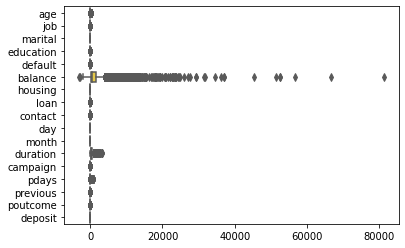

In [18]:
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

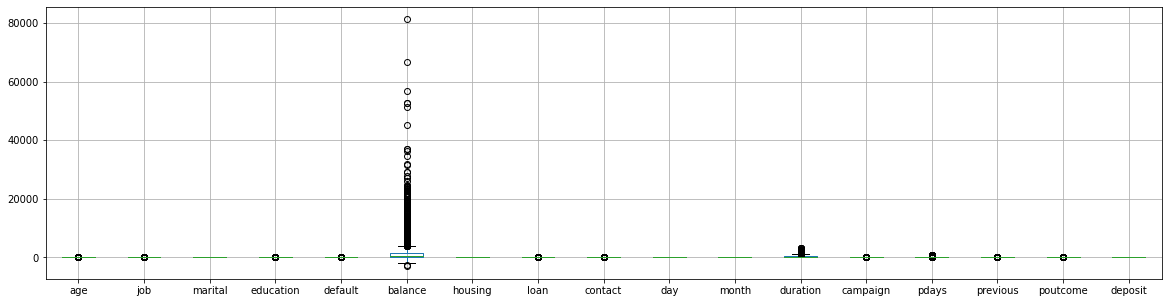

In [19]:
df.boxplot(return_type='axes', figsize=(20,5))

In [20]:
Q1 =  df['balance'].quantile(0.25) # 1º Quartile
Q3 =  df['balance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', df[df['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', df[df['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1578.0
Numerber of outliers in balance column below the lower whisker : 2
Numerber of outliers above balance column the uper whisker  : 785


In [21]:
for i in df.describe().columns:
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound 
    UTV = Q3 + 1.5 * IQR # upper bound
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', df[df[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : age
Interquartile range IQR                             : 17.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 126
Total Numbers of Ourliers                           : 126


Column Name                                         : job
Interquartile range IQR                             : 3.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 470
Total Numbers of Ourliers                           : 470


Column Name                                         : marital
Interquartile range IQR                             : 1.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 0
Total Numbers of Ourliers                           : 0


Column Name                                         : education
Interquartile range IQR                             : 1.0
Nume

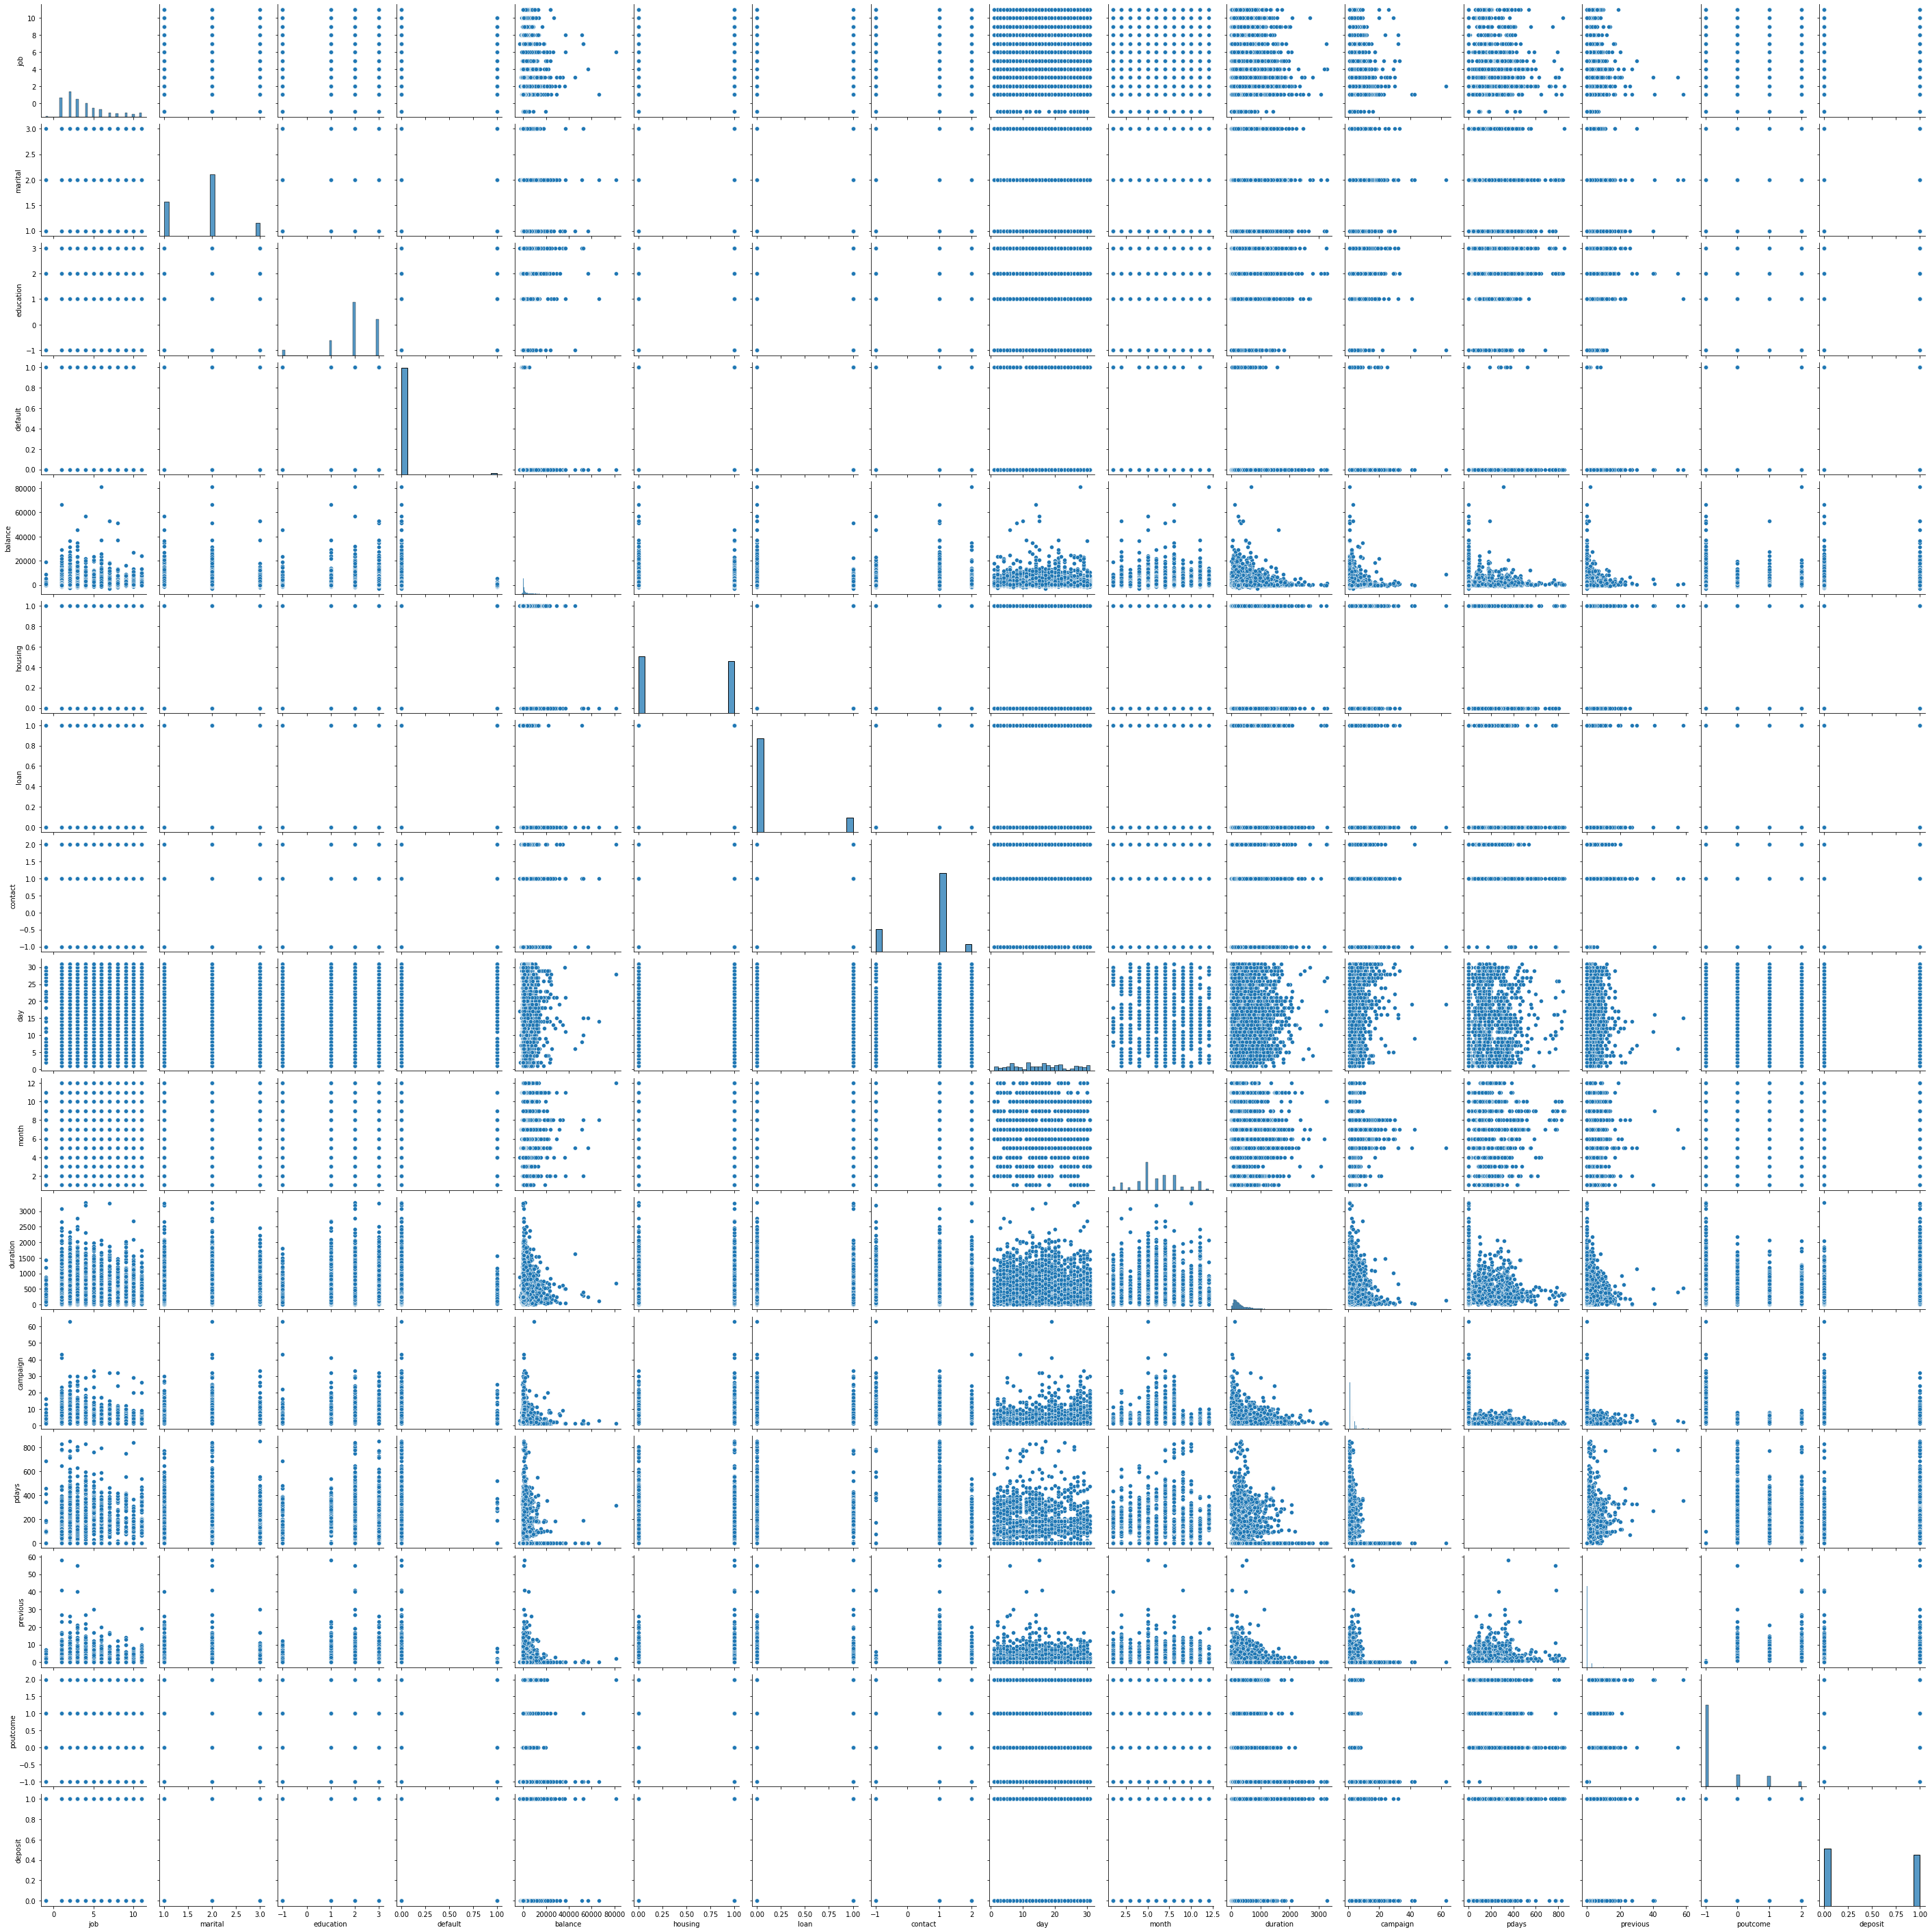

In [22]:
sns.pairplot(df.iloc[:,1:])

In [23]:
subscriber_counts = pd.DataFrame(df["deposit"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","Target"]
subscriber_counts

,Labels,Target
0,0,4428
1,1,3943


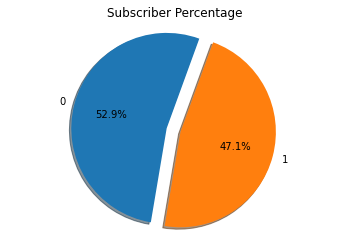

In [24]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["Target"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


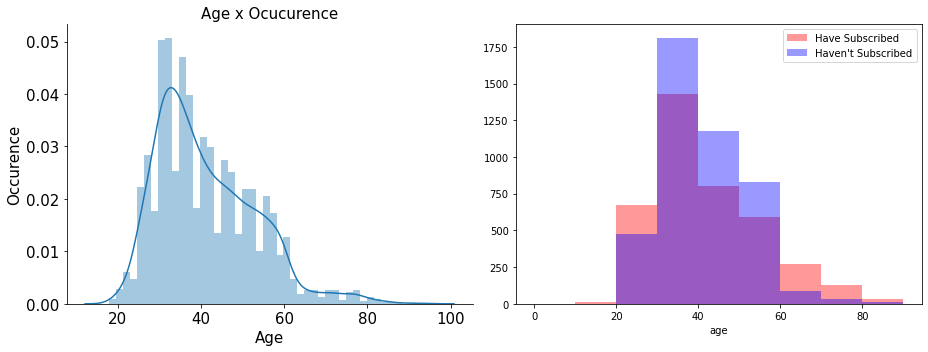

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.distplot(df['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurence', fontsize=15)
ax1.set_title('Age x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

#Age group
bins = range(0, 100, 10)
ax2 = sns.distplot(df.age[df.deposit==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.deposit==0], ax=ax2,  
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


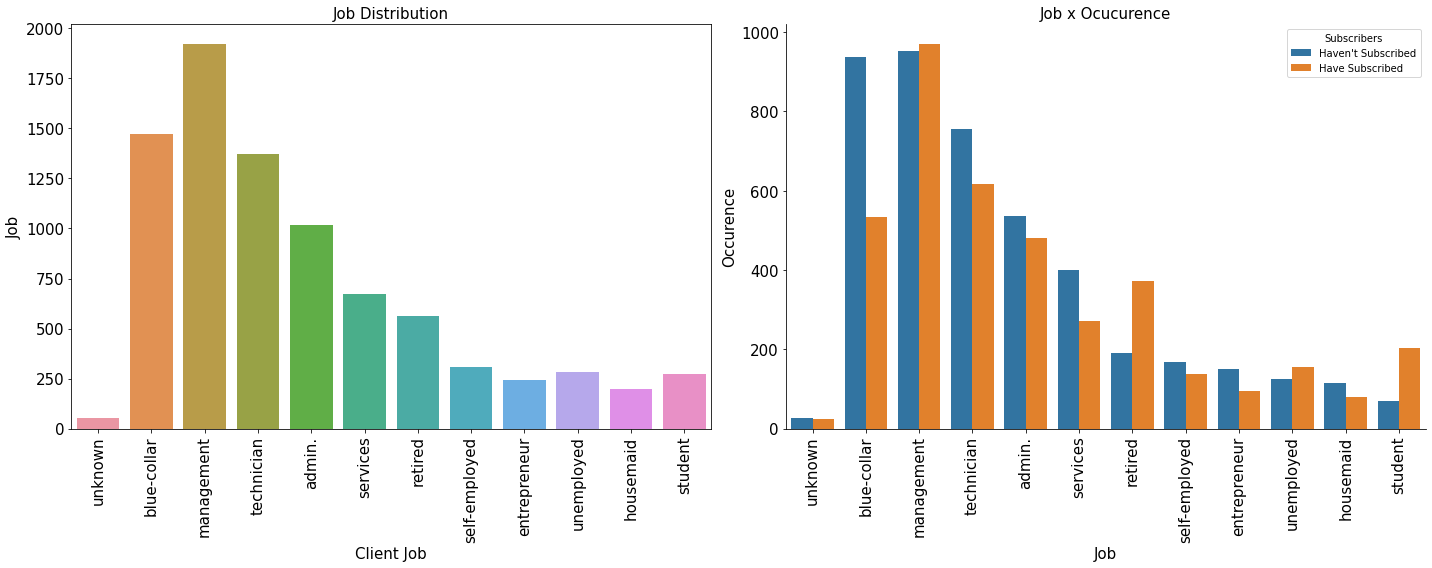

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'job', data = df, ax = ax1, )
ax1.set_xlabel('Client Job', fontsize=15)
ax1.set_ylabel('Job', fontsize=15)
ax1.set_title('Job Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['job'], rotation=90)

sns.countplot(df['job'], data = df, hue = 'deposit', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Job', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Job x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['job'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


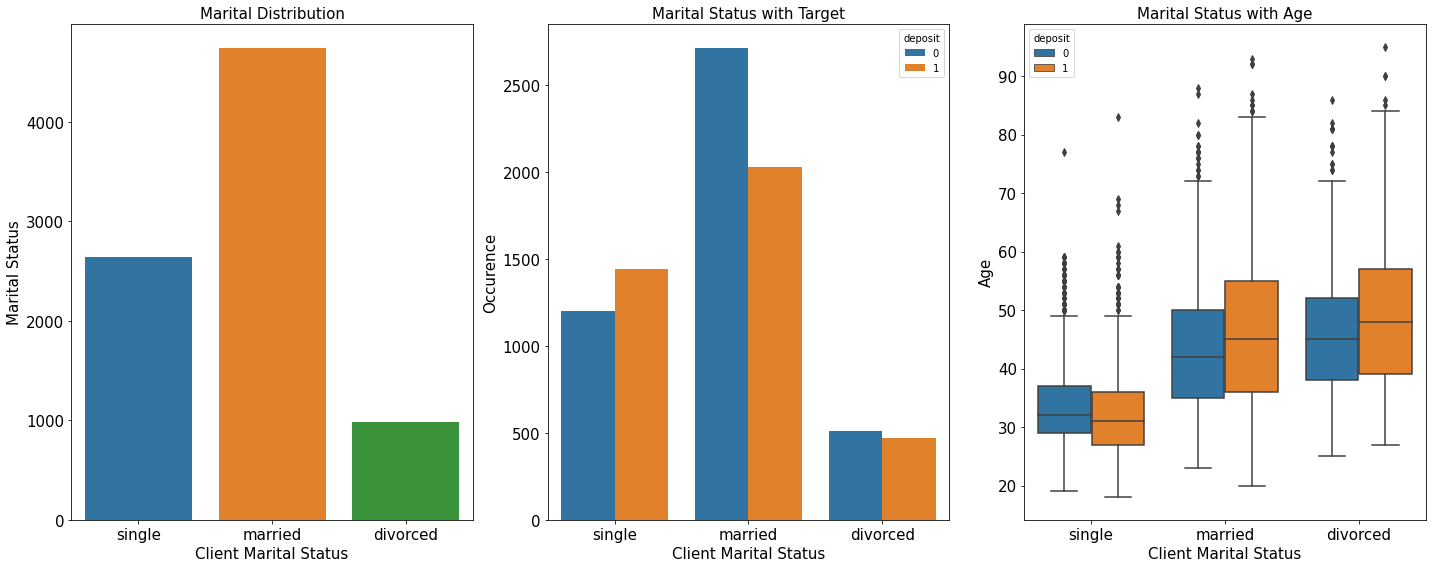

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
fig.set_size_inches(20, 8)

sns.countplot(x = 'marital', data = df, ax = ax1)
ax1.set_xlabel('Client Marital Status', fontsize=15)
ax1.set_ylabel('Marital Status', fontsize=15)
ax1.set_title('Marital Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['marital'])
ax1.tick_params(labelsize=15)

sns.countplot(df['marital'], data = df, hue = 'deposit', ax = ax2)
ax2.set_xlabel('Client Marital Status', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Marital Status with Target', fontsize=15)
ax2.set_xticklabels(replaceStruct['marital'])
ax2.tick_params(labelsize=15)

sns.boxplot(x="marital", y='age', hue="deposit", data=df, ax=ax3)
ax3.set_xlabel('Client Marital Status', fontsize=15)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Marital Status with Age', fontsize=15)
ax3.set_xticklabels(replaceStruct['marital'])
ax3.tick_params(labelsize=15)

ax3.set_xticklabels(replaceStruct['marital'])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


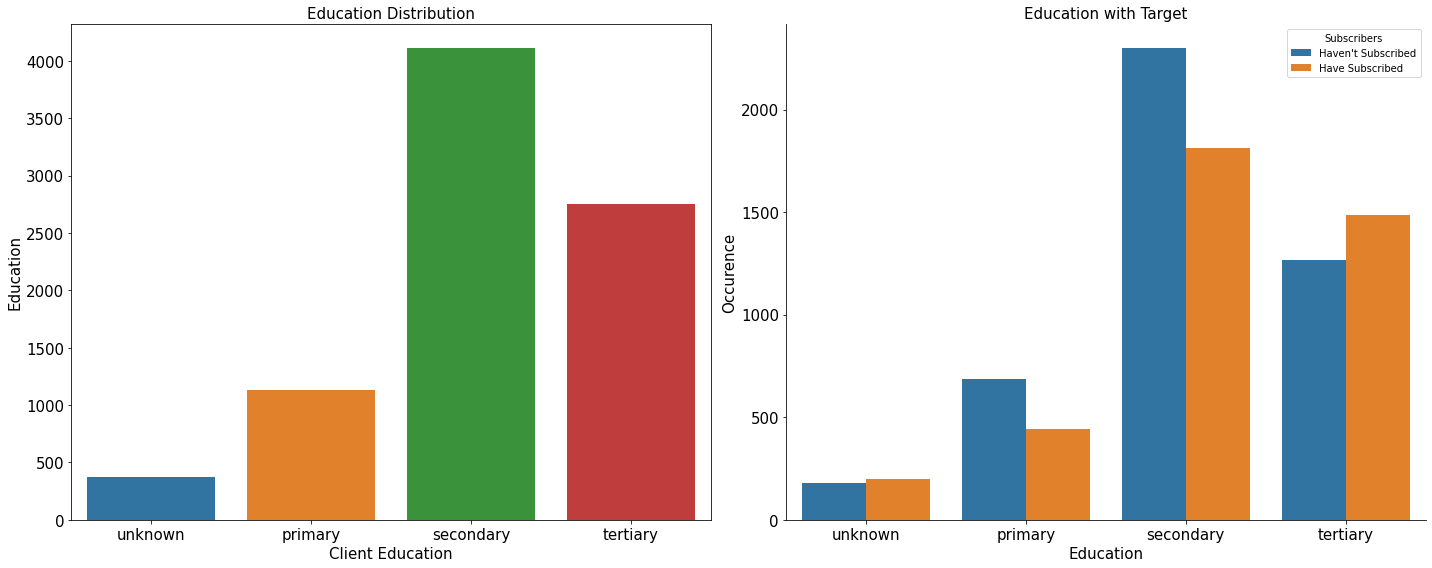

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'education', data = df, ax = ax1)
ax1.set_xlabel('Client Education', fontsize=15)
ax1.set_ylabel('Education', fontsize=15)
ax1.set_title('Education Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['education'])
ax1.tick_params(labelsize=15)


sns.countplot(df['education'], data = df, hue = 'deposit', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Education', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Education with Target', fontsize=15)
ax2.set_xticklabels(replaceStruct['education'])
ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecat

Text(0.5, 1.0, 'balance Distribution')

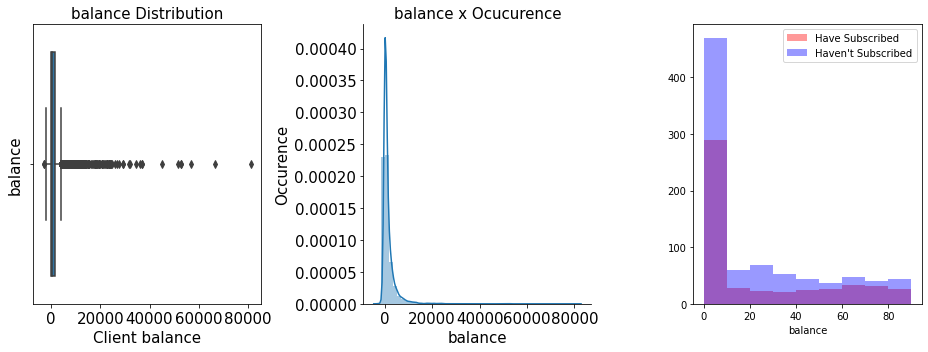

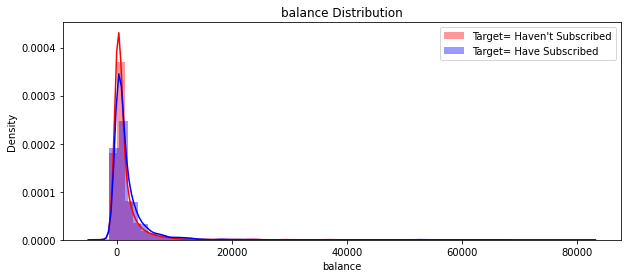

In [29]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
sns.boxplot(x = 'balance', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('balance', fontsize=15)
ax1.set_title('balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('balance', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('balance x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

bins = range(0, 100, 10)
ax3 = sns.distplot(df.balance[df.deposit==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.balance[df.deposit==0], ax=ax3, color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

plt.figure(figsize=(10,4))
sns.distplot(df[df["deposit"] == 0]['balance'], color = 'r',label="Target= Haven't Subscribed")
sns.distplot(df[df["deposit"] == 1]['balance'], color = 'b',label='Target= Have Subscribed')
plt.legend()
plt.title("balance Distribution")

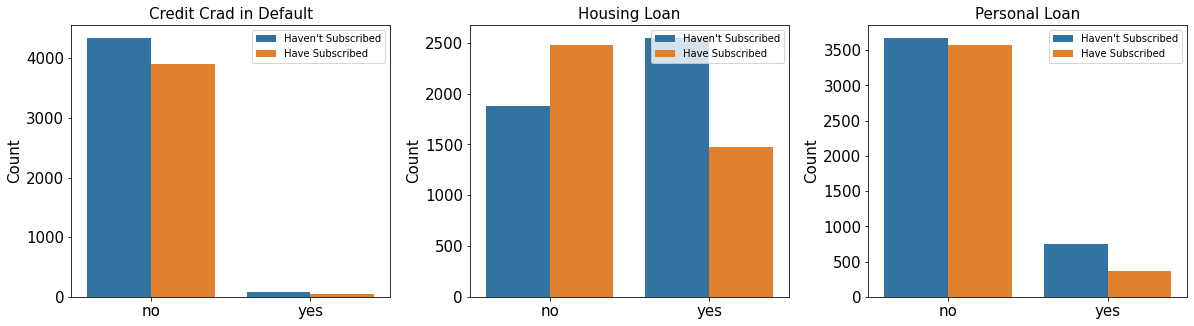

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
sns.countplot(x = 'default', data = df, hue='deposit', ax = ax1)
ax1.set_title('Credit Crad in Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['default'])
ax1.legend(["Haven't Subscribed", "Have Subscribed"])
# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df,  hue='deposit', ax = ax2)
ax2.set_title('Housing Loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['housing'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df,  hue='deposit', ax = ax3)
ax3.set_title('Personal Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticklabels(replaceStruct['loan'])
ax3.legend(["Haven't Subscribed", "Have Subscribed"])

plt.subplots_adjust(wspace=0.25)

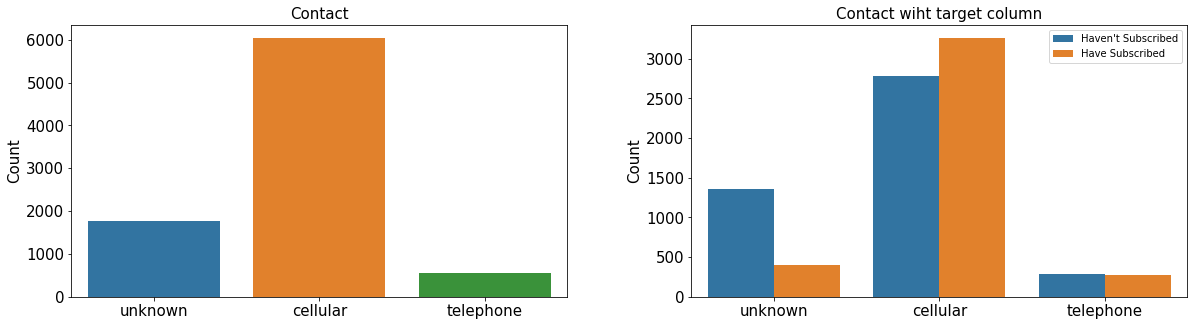

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x = 'contact', data = df,  ax = ax1)
ax1.set_title('Contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xticklabels(replaceStruct['contact'])
ax1.tick_params(labelsize=15)

sns.countplot(x = 'contact', data = df, hue='deposit', ax = ax2)
ax2.set_title('Contact wiht target column', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['contact'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])
plt.subplots_adjust(wspace=0.25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


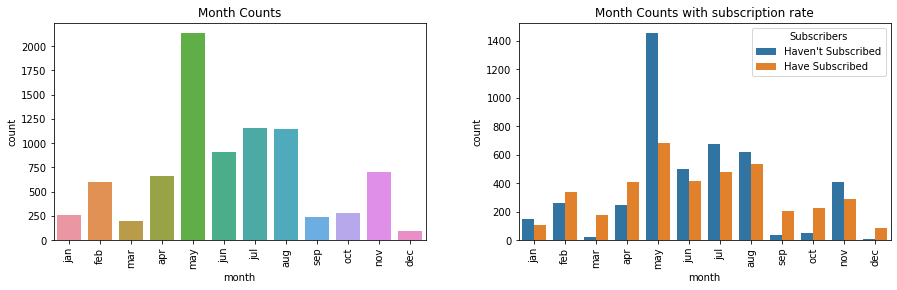

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['month'],ax = ax1)
ax1.set_xticklabels(replaceStruct['month'], rotation=90)
ax1.set_title('Month Counts')


sns.countplot(x = 'month', data=df, hue='deposit',ax = ax2)
ax2.set_xticklabels(replaceStruct['month'], rotation=90)
ax2.set_title('Month Counts with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


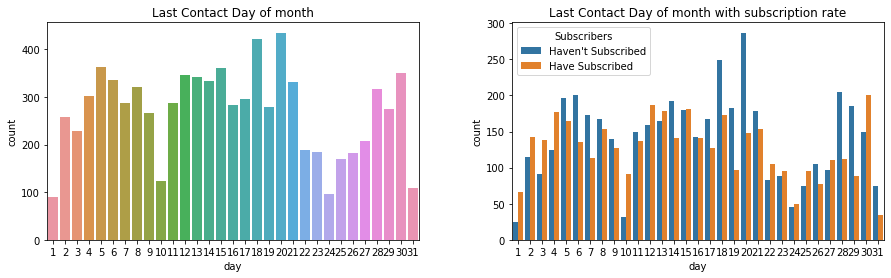

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['day'],ax = ax1)
ax1.set_title('Last Contact Day of month')


sns.countplot(x = 'day', data=df, hue='deposit',ax = ax2)
ax2.set_title('Last Contact Day of month with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, 'no'), Text(0, 0, 'yes')]

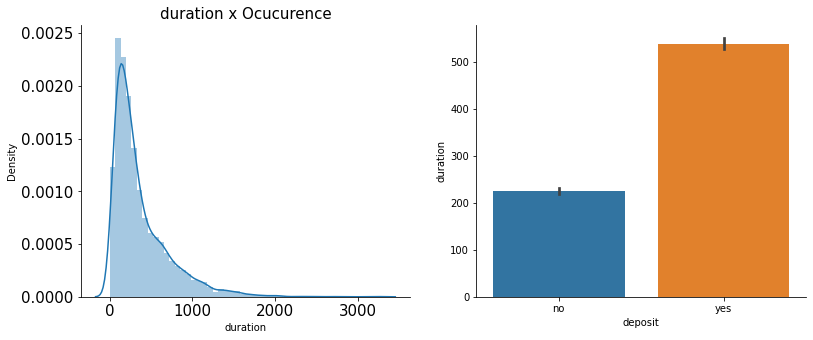

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['duration'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('duration x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="deposit", y="duration", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['deposit'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, 'no'), Text(0, 0, 'yes')]

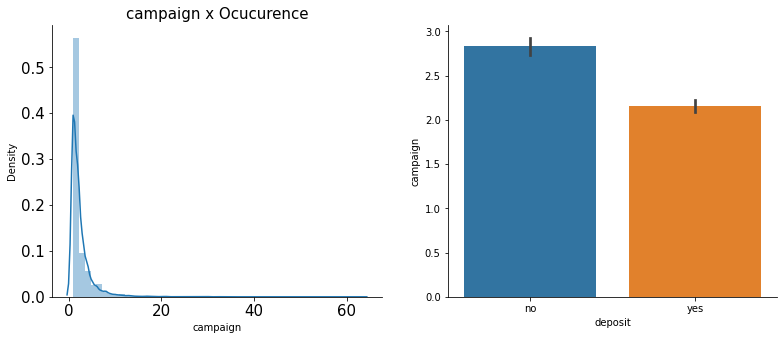

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['campaign'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('campaign x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="deposit", y="campaign", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['deposit'])

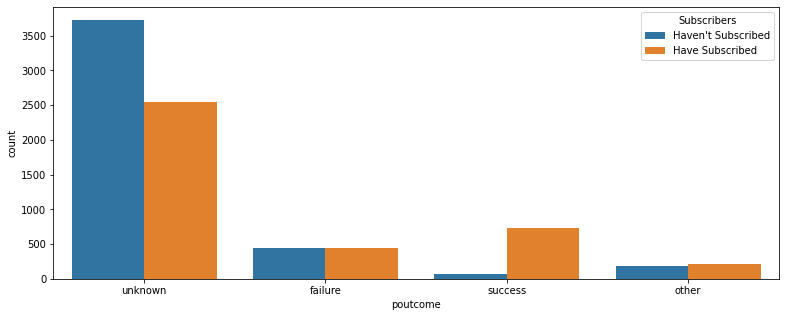

In [36]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
sns.countplot(x = 'poutcome', data=df, hue='deposit')
ax.set_xticklabels(replaceStruct['poutcome'])
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

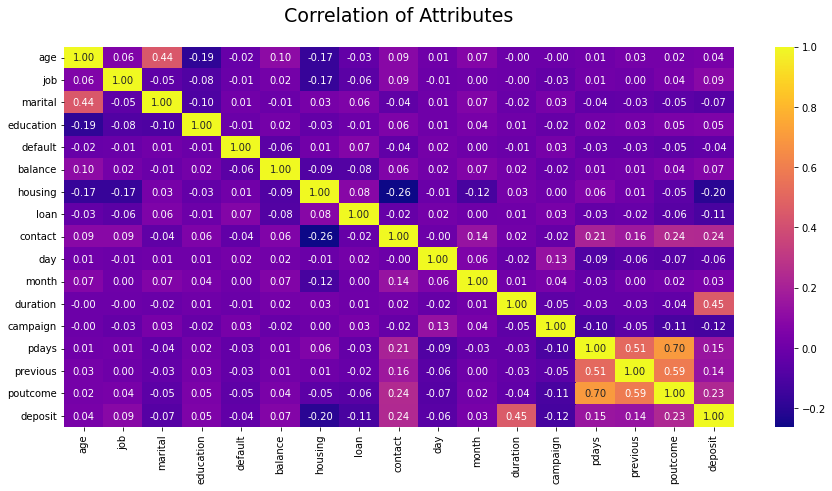

In [37]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

In [38]:
df = df.drop(['contact'], axis=1)

In [39]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,3,2,3,0,127,1,0,14,10,113,1,50,2,1,0
1,41,10,2,1,0,365,0,0,8,8,203,5,-1,0,-1,0
2,39,2,1,3,0,2454,1,0,4,5,716,3,263,2,0,1
3,49,1,2,1,0,6215,1,0,11,5,549,1,-1,0,-1,0
4,37,5,2,2,0,1694,1,1,29,1,404,2,251,6,0,0


In [40]:
df['poutcome'].head(4)

0    1
1   -1
2    0
3   -1
Name: poutcome, dtype: int64

In [41]:
df.loc[df['poutcome'] == -1, 'poutcome'] = 2
df['poutcome'].head(4)

0    1
1    2
2    0
3    2
Name: poutcome, dtype: int64

In [42]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,3,2,3,0,127,1,0,14,10,113,1,50,2,1,0


In [43]:
oneHotCols=["job", "marital", "poutcome"]
df=pd.get_dummies(df, columns=oneHotCols)

In [44]:
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,38,3,0,127,1,0,14,10,113,1,...,0,0,0,0,0,1,0,0,1,0


In [45]:
df.shape

(8371, 31)

In [46]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit',
       'job_-1', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2',
       'marital_3', 'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

In [47]:
X = df.drop('deposit', axis=1)
y = df[['deposit']]
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,38,3,0,127,1,0,14,10,113,1,...,0,0,0,0,0,1,0,0,1,0


In [48]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (5859, 30)
y train data (5859, 1)
x test data  (2512, 30)
y test data  (2512, 1)


In [49]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [50]:
# prepare cross validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)

In [51]:
LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(X_train, y_train.values.ravel())

# Predicting for test set
LogReg_y_pred               = LogReg.predict(X_test)
LogReg_Score                = LogReg.score(X_test, y_test)

LogReg_ScoreAccuracy        = accuracy_score(y_test, LogReg_y_pred)

LogReg_PrecisonScore        = precision_score(y_test, LogReg_y_pred)
LogReg_RecollScore          = recall_score(y_test, LogReg_y_pred)
LogReg_F1                   = f1_score(y_test, LogReg_y_pred)

cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

base_model_results = pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression classification Report : \n',metrics.classification_report(y_test, LogReg_y_pred))


Logistic Regression classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      1301
           1       0.83      0.73      0.77      1211

    accuracy                           0.80      2512
   macro avg       0.80      0.79      0.79      2512
weighted avg       0.80      0.80      0.80      2512



In [52]:
X = df.drop('deposit', axis=1)
y = df[['deposit']]
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,38,3,0,127,1,0,14,10,113,1,...,0,0,0,0,0,1,0,0,1,0


In [53]:
Knn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform', metric='euclidean')
Knn.fit(X_train, y_train.values.ravel())

# Predicting for test set
Knn_y_pred               = Knn.predict(X_test)
Knn_Score                = Knn.score(X_test, y_test)

Knn_ScoreAccuracy        = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisonScore        = precision_score(y_test, Knn_y_pred)
Knn_RecollScore          = recall_score(y_test, Knn_y_pred)
Knn_F1                   = f1_score(y_test, Knn_y_pred)

cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisonScore,
                                Knn_RecollScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(knn_models_results, ignore_index = True)

print('\nK-Nearest Neighbors (K-NN) classification Report : \n',metrics.classification_report(y_test, Knn_y_pred))


K-Nearest Neighbors (K-NN) classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77      1301
           1       0.78      0.65      0.71      1211

    accuracy                           0.74      2512
   macro avg       0.75      0.74      0.74      2512
weighted avg       0.75      0.74      0.74      2512



In [54]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.796576,0.830189,0.726672,0.774989,0.788186,0.017302
1,K-Nearest Neighbors,0.742834,0.782783,0.645747,0.707692,0.742275,0.013596


In [55]:
Svm = SVC(random_state = 0, kernel = 'rbf', probability= True)
Svm.fit(X_train, y_train.values.ravel())

# Predicting for test set
Svm_y_pred               = Svm.predict(X_test)
Svm_Score                = Svm.score(X_test, y_test)

Svm_ScoreAccuracy        = accuracy_score(y_test, Svm_y_pred)
Svm_PrecisonScore        = precision_score(y_test, Svm_y_pred)
Svm_RecollScore          = recall_score(y_test, Svm_y_pred)
Svm_F1                   = f1_score(y_test, Svm_y_pred)

cross_validation_result = model_selection.cross_val_score(Svm, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
svm_models_results = pd.DataFrame([['SVM (RBF)', Svm_ScoreAccuracy, Svm_PrecisonScore,
                                Svm_RecollScore, Svm_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(svm_models_results, ignore_index = True)
print('\nSVM classification Report : \n',metrics.classification_report(y_test, Svm_y_pred))


SVM classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1301
           1       0.80      0.77      0.79      1211

    accuracy                           0.80      2512
   macro avg       0.80      0.80      0.80      2512
weighted avg       0.80      0.80      0.80      2512



In [56]:
GNB = GaussianNB()
GNB.fit(X_train, y_train.values.ravel())

# Predicting for test set
GNB_y_pred               = GNB.predict(X_test)
GNB_Score                = GNB.score(X_test, y_test)

GNB_ScoreAccuracy        = accuracy_score(y_test, GNB_y_pred)
GNB_PrecisonScore        = precision_score(y_test, GNB_y_pred)
GNB_RecollScore          = recall_score(y_test, GNB_y_pred)
GNB_F1                   = f1_score(y_test, GNB_y_pred)

cross_validation_result = model_selection.cross_val_score(GNB, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

GNB_models_results = pd.DataFrame([['Naive Bayes (Gaussian)', GNB_ScoreAccuracy, GNB_PrecisonScore,
                                GNB_RecollScore, GNB_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(GNB_models_results, ignore_index = True)
print('\nGNB classification Report : \n',metrics.classification_report(y_test, GNB_y_pred))


GNB classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      1301
           1       0.73      0.58      0.64      1211

    accuracy                           0.69      2512
   macro avg       0.70      0.69      0.69      2512
weighted avg       0.70      0.69      0.69      2512



In [57]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

# Predicting for test set
dTree_y_pred               = dTree.predict(X_test)
dTree_Score                = dTree.score(X_test, y_test)

dTree_ScoreAccuracy        = accuracy_score(y_test, dTree_y_pred)
dTree_PrecisonScore        = precision_score(y_test, dTree_y_pred)
dTree_RecollScore          = recall_score(y_test, dTree_y_pred)
dTree_F1                   = f1_score(y_test, dTree_y_pred)

cross_validation_result = model_selection.cross_val_score(dTree, X_train, y_train, cv=kfold, scoring='accuracy')
dTree_models_results = pd.DataFrame([['Decision Tree ', dTree_ScoreAccuracy, dTree_PrecisonScore,
                                dTree_RecollScore, dTree_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(dTree_models_results, ignore_index = True)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

print('\nDTree classification Report : \n',metrics.classification_report(y_test, dTree_y_pred))

1.0
0.7659235668789809

DTree classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1301
           1       0.77      0.73      0.75      1211

    accuracy                           0.77      2512
   macro avg       0.77      0.76      0.77      2512
weighted avg       0.77      0.77      0.77      2512



In [58]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.796576,0.830189,0.726672,0.774989,0.788186,0.017302
1,K-Nearest Neighbors,0.742834,0.782783,0.645747,0.707692,0.742275,0.013596
2,SVM (RBF),0.797771,0.804857,0.766309,0.785110,0.798941,0.009331
3,Naive Bayes (Gaussian),0.692277,0.728601,0.576383,0.643615,0.691072,0.020041
4,Decision Tree,0.765924,0.770165,0.733278,0.751269,0.769922,0.018911


In [91]:
data=pd.read_csv('test_data.csv')


In [92]:
data.shape

(2791, 17)

In [61]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2}, 
                    }

data=data.replace(replaceStruct)
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,31,1,1,2,1,477,0,0,1,20,11,426,2,189,6,0,NaN
1,49,1,2,1,0,599,0,0,1,23,7,464,1,-1,0,-1,NaN
2,51,7,1,3,0,400,0,1,1,27,5,200,1,-1,0,-1,NaN


In [62]:
data.replace(np.nan,0)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,31,1,1,2,1,477,0,0,1,20,11,426,2,189,6,0,0.0
1,49,1,2,1,0,599,0,0,1,23,7,464,1,-1,0,-1,0.0
2,51,7,1,3,0,400,0,1,1,27,5,200,1,-1,0,-1,0.0
3,33,3,2,2,0,488,1,0,-1,8,5,703,1,-1,0,-1,0.0
4,34,4,2,2,0,40,1,0,2,5,5,125,2,-1,0,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,44,2,1,3,1,12,1,0,1,19,11,126,2,-1,0,-1,0.0
2787,37,2,1,3,0,33,1,0,1,12,3,186,1,-1,0,-1,0.0
2788,42,4,3,2,0,936,0,0,1,30,1,931,1,-1,0,-1,0.0
2789,38,11,1,-1,0,64,0,0,1,6,8,789,1,-1,0,-1,0.0


In [63]:
data = data.drop(['contact'], axis=1)

In [64]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,31,1,1,2,1,477,0,0,20,11,426,2,189,6,0,NaN
1,49,1,2,1,0,599,0,0,23,7,464,1,-1,0,-1,NaN
2,51,7,1,3,0,400,0,1,27,5,200,1,-1,0,-1,NaN
3,33,3,2,2,0,488,1,0,8,5,703,1,-1,0,-1,NaN
4,34,4,2,2,0,40,1,0,5,5,125,2,-1,0,-1,NaN


In [65]:
data['poutcome'].head(4)

0    0
1   -1
2   -1
3   -1
Name: poutcome, dtype: int64

In [67]:
data.loc[data['poutcome'] == -1, 'poutcome'] = 2
data['poutcome'].head(4)

0    0
1    2
2    2
3    2
Name: poutcome, dtype: int64

In [68]:
oneHotCols=["job", "marital", "poutcome"]
data=pd.get_dummies(data, columns=oneHotCols)

In [69]:
data.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,31,2,1,477,0,0,20,11,426,2,...,0,0,0,0,1,0,0,1,0,0


In [70]:
df.shape

(8371, 31)

In [71]:
X = df.drop('deposit', axis=1)
y = df[['deposit']]
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,38,3,0,127,1,0,14,10,113,1,...,0,0,0,0,0,1,0,0,1,0


In [72]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (5859, 30)
y train data (5859, 1)
x test data  (2512, 30)
y test data  (2512, 1)


In [73]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [74]:
Svm = SVC(random_state = 0, kernel = 'rbf', probability= True)
Svm.fit(X_train, y_train.values.ravel())

# Predicting for test set
Svm_y_pred               = Svm.predict(X_test)

In [75]:
print(Svm_y_pred )

[0 0 0 ... 1 1 0]


In [87]:
for i in Svm_y_pred:
  if i==0:
    i="no"
  else:
    i="yes"

In [89]:
Svm_y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [90]:
Svm_y_pred.shape

(2512,)

In [95]:
result = []
for i in Svm_y_pred:
  if(i == 0):
    result.append('no')
  else:
    result.append("yes")

print(result)

['no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no

In [105]:
pd.DataFrame(result).to_csv('Results.csv', index=False, header  = ['deposit'])  

In [113]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(Svm, X_test, y_test)

In [121]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'] 
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(clf.coef_[0]), feature_names, top=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: ignored